# Assignment 2

**Credits**: Federico Ruggeri, Eleonora Mancini, Paolo Torroni

**Keywords**: Sexism Detection, Multi-class Classification, LLMs, Prompting

### Team Members

- **Habib Kazemi**  
  Email: [habib.kazemi2@studio.unibo.it](mailto:habib.kazemi2@studio.unibo.it)  
  MATRICOLA: 0001119071

- **Hesam Sheikh Hassani**  
  Email: [hesam.sheikhhassani@studio.unibo.it](mailto:hesam.sheikhhassani@studio.unibo.it)  
  MATRICOLA: 0001111590

- **Ehsan Ramezani**  
  Email: [ehsan.ramezani@studio.unibo.it](mailto:ehsan.ramezani@studio.unibo.it)  
  MATRICOLA: 0001109969

### Disclaimer

This project incorporates the use of Artificial Intelligence (AI) as a supportive tool for various tasks aimed at improving the overall functionality and presentation of the project. Specifically, AI was utilized for the following purposes:

1. Grammar and Text Improvement: AI tools were employed to enhance the clarity, structure, and grammatical correctness of the written content.

2. Utility Functions and Visualizations: AI contributed to the development of helper functions for tasks like copying files from Google Drive to local directories, extracting zip files, and generating visually appealing plots for analysis and interpretation.


# Contact

For any doubt, question, issue or help, you can always contact us at the following email addresses:

Teaching Assistants:

* Federico Ruggeri -> federico.ruggeri6@unibo.it
* Eleonora Mancini -> e.mancini@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it

# Relevant Material

- Tutorial 3
- Huggingface documentation
- Huggingface hub

# Introduction

You are tasked to address the [EDOS Task A](https://github.com/rewire-online/edos) on sexism detection.

## Problem definition

Given an input text sentence, the task is to label the sentence as sexist or not sexist (binary classification).

### Examples:

**Text**: *``Schedule a date with her, then don't show up. Then text her "GOTCHA B___H".''*

**Label**: Sexist

**Text**: *``That’s completely ridiculous a woman flashing her boobs is not sexual assault in the slightest.''*

**Label**: Not sexist



## Approach

We will tackle the binary classification task with LLMs.

In particular, we'll consider zero-/few-shot prompting approaches to assess the capability of some popular open-source LLMs on this task.

## Preliminaries

We are going to download LLMs from [Huggingface](https://huggingface.co/).

Many of these open-source LLMs require you to accept their "Community License Agreement" to download them.

In summary:

- If not already, create an account of Huggingface (~2 mins)
- Check a LLM model card page (e.g., [Mistral v3](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3)) and accept its "Community License Agreement".
- Go to your account -> Settings -> Access Tokens -> Create new token -> "Repositories permissions" -> add the LLM model card you want to use.
- Save the token (we'll need it later)

### Huggingface Login

Once we have created an account and an access token, we need to login to Huggingface via code.

- Type your token and press Enter
- You can say No to Github linking

In [1]:
# I have set the hf_token environment variable To configure the User Access Token to authenticate to the Hub.
# So I don't need the following command
# !huggingface-cli login

After login, you can download all models associated with your access token in addition to those that are not protected by an access token.

### Data Loading

Since we are only interested in prompting, we do not require a train dataset.

We have preparared a small test set version of EDOS in our dedicated [Github repository](https://github.com/lt-nlp-lab-unibo/nlp-course-material).

Check the ``Assignment 2/data`` folder.
It contains:

- ``a2_test.csv`` → a small test set of 300 samples.
- ``demonstrations.csv`` -> a batch of 1000 samples for few-shot prompting.

Both datasets contain a balanced number of sexist and not sexist samples.


### Instructions

We require you to:

* **Download** the ``A2/data`` folder.
* **Encode** ``a2_test.csv`` into a ``pandas.DataFrame`` object.

In [2]:
# Copy the dataset from google drive to Colab /content/ directory
from google.colab import drive
drive.mount('/content/drive')

source_folder = '/content/drive/MyDrive/Projects/NLP/2/data'
destination_folder = '/content/'

!cp -r "$source_folder" "$destination_folder"


Mounted at /content/drive


In [3]:
import pandas as pd

csv_file_path = '/content/data/a2_test.csv'
sexism_test_df = pd.read_csv(csv_file_path)

Create a label column to map "sexist" and "not sixist" to 1 and 0



In [4]:
sexism_test_df['label'] = sexism_test_df['label_sexist'].apply(lambda x: 1 if x == 'sexist' else 0)


Let's check some rows to get the idea of the data

In [5]:
sexism_test_df.head(5)

,rewire_id,text,label_sexist,label
0,sexism2022_english-17133,The boys must be gaming because there goes the...,not sexist,0
1,sexism2022_english-14197,Look at those eyes. Either someone unexpectedl...,sexist,1
2,sexism2022_english-3018,Old man mogs everyone in this sub,not sexist,0
3,sexism2022_english-5301,"Excellent, I was just looking at another post ...",not sexist,0
4,sexism2022_english-17796,So you run back to daddy whenever you need hel...,sexist,1


# [Task 1 - 0.5 points] Model setup

Once the test data has been loaded, we have to setup the model pipeline for inference.

In particular, we have to:
- Load the model weights from Huggingface
- Quantize the model to fit into a single-GPU limited hardware

## Which LLMs?

The pool of LLMs is ever increasing and it's impossible to keep track of all new entries.

We focus on popular open-source models.

- [Mistral v2](mistralai/Mistral-7B-Instruct-v0.2)
- [Mistral v3](mistralai/Mistral-7B-Instruct-v0.3)
- [Llama v3.1](https://huggingface.co/meta-llama/Llama-3.1-8B-Instruct)
- [Phi3-mini](https://huggingface.co/microsoft/Phi-3-mini-4k-instruct)

Other open-source models are more than welcome!

### Instructions

In order to get Task 1 points, we require you to:

* Pick 2 model cards from the provided list.
* For each model:
  - Define a separate section of your notebook for the model.
  - Setup a quantization configuration for the model.
  - Load the model via HuggingFace APIs.


### Notes

1. There's a popular library integrated with Huggingface's ``transformers`` to perform quantization.

2. Define two separate sections of your notebook to show that you have implemented the prompting pipeline for each selected model card.

# Install dependencies

In [6]:
# install quantization libraries
!pip install -q transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.8 MB/s eta 0:00:00


# Import required dependencies

In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import re
import gc
import copy

In [8]:
def clear_gpu_memory():
    """
    Clears GPU memory cache and garbage collects Python objects
    """
    # Clear GPU cache
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    # Force garbage collection
    gc.collect()

It takes lot's of time to download the models, so I change the cache location to google drive and it will load faster

In [9]:
import os
CACHE_LOCATION_IN_GD = "/content/drive/MyDrive/Projects/NLP/cache"
os.environ['HF_HOME'] = CACHE_LOCATION_IN_GD


# mistralai/Mistral-7B-Instruct-v0.3 Setup

In [10]:
# Define the quantization configuration
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

mistral3_model_card = "mistralai/Mistral-7B-Instruct-v0.3"
mistral3_model = AutoModelForCausalLM.from_pretrained(
    mistral3_model_card,
    quantization_config=quantization_config,
    device_map="auto",
    cache_dir=CACHE_LOCATION_IN_GD
)

# Load the tokenizer
mistral3_tokenizer = AutoTokenizer.from_pretrained(mistral3_model_card)
# config the padding token in tokenizer and model
mistral3_tokenizer.pad_token = mistral3_tokenizer.eos_token
mistral3_model.generation_config.pad_token_id = mistral3_tokenizer.pad_token_id


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

\# microsoft/Phi-3.5-mini-instruct Setup


In [11]:
phi3_model_card = "microsoft/Phi-3.5-mini-instruct"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enable 4-bit quantization
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
phi3_model = AutoModelForCausalLM.from_pretrained(
    phi3_model_card,
    quantization_config=quantization_config,
    device_map="auto",
    cache_dir=CACHE_LOCATION_IN_GD
)



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [12]:
# Load the tokenizer
phi3_tokenizer = AutoTokenizer.from_pretrained(phi3_model_card)

# config the padding token in tokenizer and model
phi3_tokenizer.pad_token = phi3_tokenizer.eos_token
phi3_model.generation_config.pad_token_id = phi3_tokenizer.pad_token_id

tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

# [Task 2 - 1.0 points] Prompt setup

Prompting requires an input pre-processing phase where we convert each input example into a specific instruction prompt.


## Prompt Template

Use the following prompt template to process input texts.

In [13]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        TEXT:
        {text}

        ANSWER:
        """
    }
]

### Instructions

In order to get Task 2 points, we require you to:

* Write a ``prepare_prompts`` function as the one reported below.

In [14]:
def prepare_prompts(texts, prompt_template, tokenizer):
    """
    This function formats input text samples into instructions prompts
    and tokenizes them using the provided tokenizer.

    Inputs  :
      texts: input texts to classify via prompting
      prompt_template: the prompt template provided in this assignment
      tokenizer: the transformers Tokenizer object instance

    Outputs:
      tokenized input texts in the form of instruction prompts
    """
    batch_prompts = [
          [
              prompt_template[0],
              {
                  "role": prompt_template[1]["role"],
                  "content": prompt_template[1]["content"].format(text=text),
              },
          ]
          for text in texts
      ]

    tokenized_inputs = tokenizer.apply_chat_template(batch_prompts, tokenize=True, return_dict=True, add_generation_prompt=True,  return_tensors="pt", padding=True).to("cuda")

    return tokenized_inputs

### Notes

1. You are free to modify the prompt format (**not its content**) as you like depending on your code implementation.

2. Note that the provided prompt has placeholders. You need to format the string to replace placeholders. Huggingface might have dedicated APIs for this.

# [Task 3 - 1.0 points] Inference

We are now ready to define the inference loop where we prompt the model with each pre-processed sample.

### Instructions

In order to get Task 3 points, we require you to:

* Write a ``generate_responses`` function as the one reported below.
* Write a ``process_response`` function as the one reported below.

In [15]:
def generate_responses(model, prompt_examples):
  """
    This function implements the inference loop for a LLM model.
    Given a set of examples, the model is tasked to generate a response.

    Inputs:
      model: LLM model instance for prompting
      prompt_examples: pre-processed text samples

    Outputs:
      generated responses
  """
  with torch.inference_mode():
    # We are using Greedy decoding
    return model.generate(**prompt_examples, max_new_tokens=10)

In [16]:
def process_response(response):
  """
    This function takes a textual response generated by the LLM
    and processes it to map the response to a binary label.

    Inputs:
      response: generated response from LLM

    Outputs:
      parsed binary response: return 1 if YES and 0 if NO
  """
  response_text = response.strip()

  if response_text == "YES":
      return 1
  else:
      return 0


In [17]:
def extract_yes_no(response):
  """
  Extracts the last "YES" or "NO" answer from a given response string.

  Args:
      response: The response string containing one or more "ANSWER:" sections.

  Returns:
      The extracted "YES" or "NO" answer from the last "ANSWER:" section.
          Returns "fail" if "YES" or "NO" answer is not found immediately after ANSWER:.
  """
  match_last_ANSWER = [m for m in re.finditer('ANSWER:', response)][-1]
  parsed = response[match_last_ANSWER.end():].strip()

  yes_no_match = re.match(r"(YES|NO)", parsed)
  if yes_no_match:
      return yes_no_match.group(1).strip()
  else:
      return "fail"

In [18]:
def sexism_detection_pipeline(texts, model, tokenizer, prompt_template, batch_size):
  """
  Processes a list of texts to detect sexism using a specified model and tokenizer.

  Args:
    texts: The input texts to be analyzed.
    model: The pre-trained model used for generating responses.
    tokenizer: The tokenizer used for encoding and decoding text.
    prompt_template: The template used to create prompts for the model.
    batch_size: The number of texts to process in each batch.

  Returns:
    The generated responses directly from the model.
  """
  results = []
  for i in range(0, len(texts), batch_size):
    tokenized_inputs = prepare_prompts(texts[i:i+batch_size], prompt_template, tokenizer)
    generated_ids = generate_responses(model, tokenized_inputs)

    decoded_responses = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

    results.extend(decoded_responses)

  return results

## Notes

1. According to our tests, it should take you ~10 mins to perform full inference on 300 samples.

# [Task 4 - 0.5 points] Metrics

In order to evaluate selected LLMs, we need to compute performance metrics.

In particular, we are interested in computing **accuracy** since the provided data is balanced with respect to classification classes.

Moreover, we want to compute the ratio of failed responses generated by models.

That is, how frequent the LLM fails to follow instructions and provides incorrect responses that do not address the classification task.

We denote this metric as **fail-ratio**.

In summary, we parse generated responses as follows:
- 1 if the model says YES
- 0 if the model says NO
- 0 if the model does not answer in either way

### Instructions

In order to get Task 4 points, we require you to:

* Write a ``compute_metrics`` function as the one reported below.
* Compute metrics for the two selected LLMs.

In [19]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(responses, y_true):
  """
    This function takes predicted and ground-truth labels and compute metrics.
    In particular, this function compute accuracy and fail-ratio metrics.
    This function internally invokes `process_response` to compute metrics.

    Inputs:
      responses: generated LLM responses
      y_true: ground-truth binary labels

    Outputs:
      dictionary containing desired metrics
  """
  binary_predictions = []
  fail_count = 0

  for response in responses:
      result = extract_yes_no(response)
      if result in ["YES", "NO"]:
          binary_predictions.append(process_response(result))
      else:
          binary_predictions.append(0)  # Default to 0 if answer not found
          fail_count += 1

  fail_ratio = fail_count / len(responses) if len(responses) else 0

  accuracy = accuracy_score(y_true, binary_predictions)

  return {"accuracy": accuracy, "fail_ratio": fail_ratio}

### Calculate metrics for Mistral3 Zero Shot

In [20]:
%%time
sexism_test_df['mistral3_zero_shot_responses'] = sexism_detection_pipeline(sexism_test_df['text'], mistral3_model, mistral3_tokenizer, prompt, 16)

CPU times: user 2min 45s, sys: 1min 36s, total: 4min 21s
Wall time: 4min 24s


In [21]:
# Compute the metrics for mistral3 zero shot
mistral3_zero_shot_metrics = compute_metrics(np.array(sexism_test_df['mistral3_zero_shot_responses']), np.array(sexism_test_df['label']))

print("Mistral3 zero shot metrics:")
mistral3_zero_shot_metrics

Mistral3 zero shot metrics:


{'accuracy': 0.59, 'fail_ratio': 0.0033333333333333335}

In [22]:
clear_gpu_memory()

### Calculate metrics for Phi3 Zero Shot

In [23]:
%%time
sexism_test_df['phi3_zero_shot_responses'] = sexism_detection_pipeline(sexism_test_df['text'], phi3_model, phi3_tokenizer, prompt, 16)

CPU times: user 2min 44s, sys: 9.5 ms, total: 2min 44s
Wall time: 2min 45s


In [24]:
# Compute the metrics for phi3 zero shot
phi3_zero_shot_metrics = compute_metrics(np.array(sexism_test_df['phi3_zero_shot_responses']), np.array(sexism_test_df['label']))

print("Phi3 zero shot metrics:")
phi3_zero_shot_metrics

Phi3 zero shot metrics:


{'accuracy': 0.59, 'fail_ratio': 0.0}

In [25]:
clear_gpu_memory()

# [Task 5 - 1.0 points] Few-shot Inference

So far, we have tested models in a zero-shot fashion: we provide the input text to classify and instruct the model to generate a response.

We are now interested in performing few-shot prompting to see the impact of providing demonstration examples.

To do so, we slightly change the prompt template as follows.

In [26]:
prompt = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        EXAMPLES:
        {examples}

        TEXT:
        {text}

        ANSWER:
        """
    }
]

The new prompt template reports some demonstration examples to instruct the model.

Generally, we provide an equal number of demonstrations per class as shown in the example below.

In [27]:
prompt_example = [
    {
        'role': 'system',
        'content': 'You are an annotator for sexism detection.'
    },
    {
        'role': 'user',
        'content': """Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        EXAMPLES:
        TEXT: **example 1**
        ANSWER: YES
        TEXT: **example 2**
        ANSWER: NO

        TEXT:
        {text}

        ANSWER:
        """
    }
]

## Instructions

In order to get Task 5 points, we require you to:

- Load ``demonstrations.csv`` and encode it into a ``pandas.DataFrame`` object.
- Define a ``build_few_shot_demonstrations`` function as the one reported below.
- Perform few-shot inference as in Task 3.
- Compute metrics as in Task 4.

In [28]:
demonstrations_df = pd.read_csv('/content/data/demonstrations.csv')
# Let's take a look at demonstration_df
demonstrations_df.head(5)

,rewire_id,text,label_sexist
0,sexism2022_english-10348,I would never have my kid go to a daycare with...,not sexist
1,sexism2022_english-7950,Democrat women are so butt fucking ugly.,sexist
2,sexism2022_english-7742,If you really wanted to twist the knife you’d ...,not sexist
3,sexism2022_english-16170,Those women are pro-rape. They didn’t care abo...,sexist
4,sexism2022_english-9857,Married a bitch... Is it the standard scenario...,sexist


In [29]:
def build_few_shot_demonstrations(demonstrations, num_per_class):
  """
  Builds few-shot demonstrations for the prompt.

  Inputs:
    demonstrations: pandas.DataFrame containing the demonstrations.
    num_per_class: Number of demonstrations per class (sexist/not sexist).

  Outputs:
    A list of demonstrations, where each demonstration is a dictionary
    with 'text' and 'answer' keys.
  """

  # Filter demonstrations for each class
  sexist_demonstrations = demonstrations[demonstrations['label_sexist'] == 'sexist'].sample(num_per_class, random_state=42)
  not_sexist_demonstrations = demonstrations[demonstrations['label_sexist'] == 'not sexist'].sample(num_per_class, random_state=42)

  # Build the list of demonstrations
  demonstrations_list = []
  for _, row in pd.concat([sexist_demonstrations, not_sexist_demonstrations]).iterrows():
    demonstrations_list.append({
        'text': row['text'],
        'answer': 'YES' if row['label_sexist'] == 'sexist' else 'NO'
    })

  return demonstrations_list

### UPDATE the promp and add the few shot examples

In [30]:
def create_n_shot_prompt(prompt, examples_df, num_per_class):
  """
  Creates an n-shot prompt by adding few-shot learning examples to the given prompt.

  Args:
    prompt: Initial prompt template.
    examples_df: A DataFrame containing the examples to be used for few-shot learning.
    num_per_class: The number of examples to include per class.

  Returns:
    A modified prompt with few-shot learning examples included.
  """
  n_shot_prompt = copy.deepcopy(prompt)
  n_shot_demonstrations = build_few_shot_demonstrations(examples_df, num_per_class=num_per_class)
  examples_string = "\n".join([f"TEXT: {d['text']}\nANSWER: {d['answer']}" for d in n_shot_demonstrations])
  n_shot_prompt[1]['content'] = n_shot_prompt[1]['content'].format(examples=examples_string, text="{text}")

  return n_shot_prompt




In [31]:
two_shot_prompt = create_n_shot_prompt(prompt, demonstrations_df, num_per_class=2)
for key,value in two_shot_prompt[1].items():
  print(key, value)

role user
content Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        EXAMPLES:
        TEXT: nothing irks a left wing feminist worse than seeing a beautiful virtuous woman who is conservative they HATE her H-A-T-E so they try to suppress her next it will be illegal to be born beautiful they'll call it "Hate Birth"
ANSWER: YES
TEXT: Get #TRIGGERED, Hillaryfags, femme-fags, and feminazis: [URL] #MAGA #TRUMP #ELECTION2016 [URL]
ANSWER: YES
TEXT: Can't see much of her but she's hotter than any vagina-hat wearer in the Women's March
ANSWER: NO
TEXT: DOES BLACK HAMILTON STAR DRUNK-RAPE WHITE WOMEN? If you name-check the VP-Elect of the United States in a one-sided insulting harangue, it'd be wise to delete the tweets that suggest you rape drunk white girls: #BoycottHamilton [URL]
ANSWER: NO

        TEXT:
        {text}

        ANSWER:
        


In [32]:
four_shot_prompt = create_n_shot_prompt(prompt, demonstrations_df, num_per_class=4)
for key,value in four_shot_prompt[1].items():
  print(key, value)


role user
content Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        EXAMPLES:
        TEXT: nothing irks a left wing feminist worse than seeing a beautiful virtuous woman who is conservative they HATE her H-A-T-E so they try to suppress her next it will be illegal to be born beautiful they'll call it "Hate Birth"
ANSWER: YES
TEXT: Get #TRIGGERED, Hillaryfags, femme-fags, and feminazis: [URL] #MAGA #TRUMP #ELECTION2016 [URL]
ANSWER: YES
TEXT: HAHAHA! Why would an alpha get married to an old hag when he has literally hundreds of hot 18-19 year olds (and older bitches too but eeewww amirite??) begging him to fuck them? Feeeemale logic.
ANSWER: YES
TEXT: Ohthisfucking fits so fking perfectly I am laughing my ass off! Scary bitch she is the devil and it is perfect it's in her state of ARKANSAS!!!
ANSWER: YES
TEXT: Can't see much of her but she's hotter than any vagina-hat wearer in the Women's March
ANSWER: NO
TEXT: DOES BLACK HAMILTON STAR DR

### Calculate metrics for Mistral3 Few Shot

Mistral3 Two Shot:





In [33]:
%%time
sexism_test_df['mistral3_two_shot_responses'] = sexism_detection_pipeline(sexism_test_df['text'], mistral3_model, mistral3_tokenizer, two_shot_prompt, 16)


CPU times: user 7min 42s, sys: 4min 39s, total: 12min 22s
Wall time: 12min 43s


In [34]:
# Compute the metrics for Mistral3 two Shot
mistral3_two_shot_metrics = compute_metrics(np.array(sexism_test_df['mistral3_two_shot_responses']), np.array(sexism_test_df['label']))

print("Mistral3 two shot metrics:")
mistral3_two_shot_metrics

Mistral3 two shot metrics:


{'accuracy': 0.72, 'fail_ratio': 0.0}

In [35]:
clear_gpu_memory()

Mistral3 Four Shot:

In [36]:
%%time
sexism_test_df['mistral3_four_shot_responses'] = sexism_detection_pipeline(sexism_test_df['text'], mistral3_model, mistral3_tokenizer, four_shot_prompt, 16)

CPU times: user 11min 10s, sys: 6min 51s, total: 18min 1s
Wall time: 19min 6s


In [37]:
# Compute the metrics for Mistral3 Four Shot
mistral3_four_shot_metrics = compute_metrics(np.array(sexism_test_df['mistral3_four_shot_responses']), np.array(sexism_test_df['label']))

print("Mistral3 Four shot metrics:")
mistral3_four_shot_metrics

Mistral3 Four shot metrics:


{'accuracy': 0.7, 'fail_ratio': 0.0}

### Calculate Metrics for Phi3 Few Shot

Phi3 Two Shot:

In [38]:
clear_gpu_memory()

In [39]:
%%time
sexism_test_df['phi3_two_shot_responses'] = sexism_detection_pipeline(sexism_test_df['text'], phi3_model, phi3_tokenizer, two_shot_prompt, 16)

CPU times: user 6min 30s, sys: 156 ms, total: 6min 31s
Wall time: 6min 32s


In [40]:
# Compute the metrics for Phi3 Two Shot
phi3_two_shot_metrics = compute_metrics(np.array(sexism_test_df['phi3_two_shot_responses']), np.array(sexism_test_df['label']))

print("Phi3 two shot metrics:")
phi3_two_shot_metrics

Phi3 two shot metrics:


{'accuracy': 0.65, 'fail_ratio': 0.0}

Phi3 Four Shot:

In [41]:
clear_gpu_memory()

In [42]:
%%time
sexism_test_df['phi3_four_shot_responses'] = sexism_detection_pipeline(sexism_test_df['text'], phi3_model, phi3_tokenizer, four_shot_prompt, 8)

CPU times: user 11min 8s, sys: 571 ms, total: 11min 9s
Wall time: 11min 12s


In [43]:
# Compute the metrics for Phi3 Four Shot
phi3_four_shot_metrics = compute_metrics(np.array(sexism_test_df['phi3_four_shot_responses']), np.array(sexism_test_df['label']))

print("Phi3 four shot metrics:")
phi3_four_shot_metrics

Phi3 four shot metrics:


{'accuracy': 0.5866666666666667, 'fail_ratio': 0.0}

In [44]:
sexism_test_df.head(3)

,rewire_id,text,label_sexist,label,mistral3_zero_shot_responses,phi3_zero_shot_responses,mistral3_two_shot_responses,mistral3_four_shot_responses,phi3_two_shot_responses,phi3_four_shot_responses
0,sexism2022_english-17133,The boys must be gaming because there goes the...,not sexist,0,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection. You...,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection. You...,You are an annotator for sexism detection. You...
1,sexism2022_english-14197,Look at those eyes. Either someone unexpectedl...,sexist,1,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection. You...,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection. You...,You are an annotator for sexism detection. You...
2,sexism2022_english-3018,Old man mogs everyone in this sub,not sexist,0,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection. You...,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection.\n\n...,You are an annotator for sexism detection. You...,You are an annotator for sexism detection. You...


## Notes

1. You are free to pick any value for ``num_per_class``.

2. According to our tests, few-shot prompting increases inference time by some minutes (we experimented with ``num_per_class`` $\in [2, 4]$).

# [Task 6 - 1.0 points] Error Analysis

We are now interested in evaluating model responses and comparing their performance.

This analysis helps us in understanding

- Classification task performance gap: are the models good at this task?
- Generation quality: which kind of responses do models generate?
- Errors: which kind of mistakes do models do?

### Instructions

In order to get Task 6 points, we require you to:

* Compare classification performance of selected LLMs in a Table.
* Compute confusion matrices for selected LLMs.
* Briefly summarize your observations on generated responses.

### Classification Performances in a Table

In [45]:
import pandas as pd

comparison_data = {
    "Shots": ["Zero Shot", "Two Shot", "Four Shot"],

    # Mistral columns
    "Accuracy (Mistral)": [
        mistral3_zero_shot_metrics["accuracy"],
        mistral3_two_shot_metrics["accuracy"],
        mistral3_four_shot_metrics["accuracy"]
    ],
    "Fail Ratio (Mistral)": [
        mistral3_zero_shot_metrics["fail_ratio"],
        mistral3_two_shot_metrics["fail_ratio"],
        mistral3_four_shot_metrics["fail_ratio"]
    ],

    # Phi columns
    "Accuracy (Phi)": [
        phi3_zero_shot_metrics["accuracy"],
        phi3_two_shot_metrics["accuracy"],
        phi3_four_shot_metrics["accuracy"]
    ],
    "Fail Ratio (Phi)": [
        phi3_zero_shot_metrics["fail_ratio"],
        phi3_two_shot_metrics["fail_ratio"],
        phi3_four_shot_metrics["fail_ratio"]
    ]
}

comparison_df = pd.DataFrame(comparison_data)

comparison_df


,Shots,Accuracy (Mistral),Fail Ratio (Mistral),Accuracy (Phi),Fail Ratio (Phi)
0,Zero Shot,0.59,0.003333,0.590000,0.0
1,Two Shot,0.72,0.000000,0.650000,0.0
2,Four Shot,0.70,0.000000,0.586667,0.0


### Confusion Matrices

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def compute_confusion_matrix(model_predictions, true_labels):
    """
    Computes the confusion matrix for the given model predictions and true labels.

    Args:
        model_predictions: The list of predictions made by the model, where each prediction is a string response.
        true_labels: The list of true labels corresponding to the predictions, where each label is an integer (0 or 1).

    Returns:
        The confusion matrix as a 2x2 numpy array.
    """
    binary_predictions = []
    for response in model_predictions:
        answer = extract_yes_no(response)
        binary_predictions.append(process_response(answer))
    return confusion_matrix(true_labels, binary_predictions)

def plot_confusion_matrices(model_responses, true_labels, titles, figsize=(15, 12)):
    """
    Plots multiple confusion matrices in a grid layout.

    Args:
        model_responses: A list of model_responses list, where each item is a list of string responses.
        true_labels: The list of true labels corresponding to the predictions, where each label is an integer (0 or 1).
        titles: A list of titles corresponding to each model.
        figsize: The overall figure size for the plot grid.

    Returns:
        None: Displays a grid of confusion matrices.
    """
    fig, axes = plt.subplots(3, 2, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes for easy iteration

    for idx, (model_predictions, title) in enumerate(zip(model_responses, titles)):
        cm = compute_confusion_matrix(model_predictions, true_labels)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Not Sexist", "Sexist"],
                    yticklabels=["Not Sexist", "Sexist"],
                    ax=axes[idx])
        axes[idx].set_title(title)
        axes[idx].set_xlabel("Predicted Label")
        axes[idx].set_ylabel("True Label")

    # Hide any unused subplots
    for idx in range(len(model_responses), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


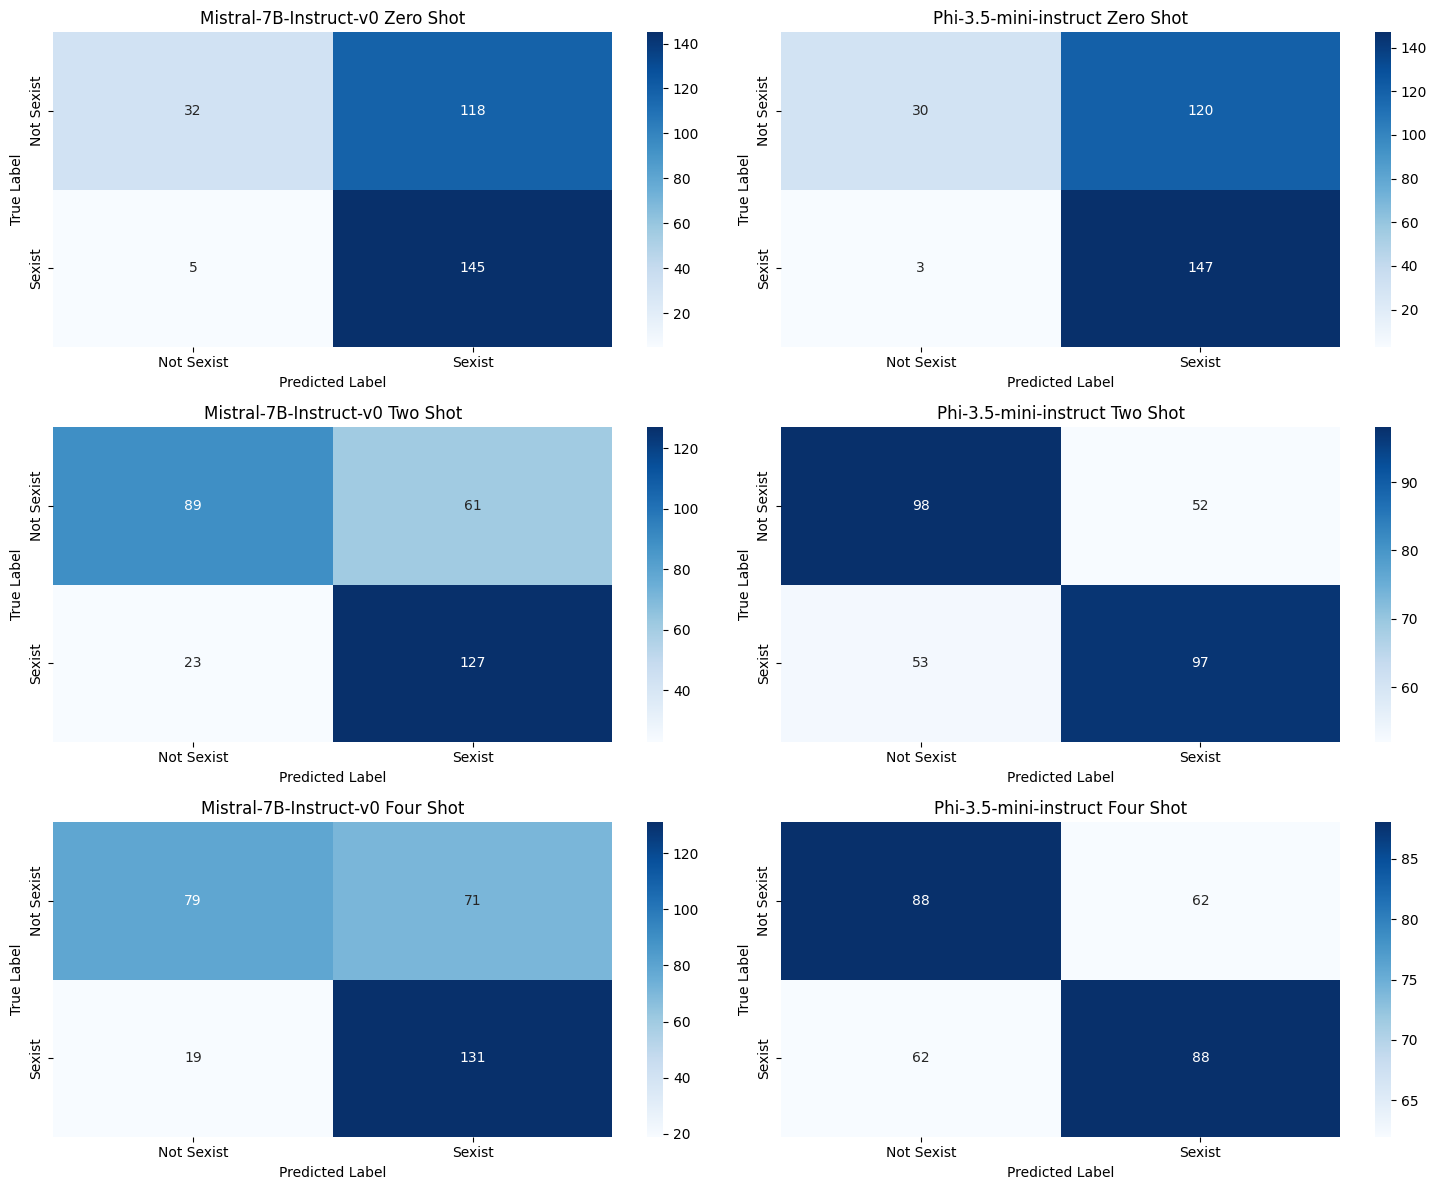

In [47]:
# Prepare the data for plotting
models_and_responses = [
    sexism_test_df['mistral3_zero_shot_responses'],
    sexism_test_df['phi3_zero_shot_responses'],
    sexism_test_df['mistral3_two_shot_responses'],
    sexism_test_df['phi3_two_shot_responses'],
    sexism_test_df['mistral3_four_shot_responses'],
    sexism_test_df['phi3_four_shot_responses']
]

titles = [
    "Mistral-7B-Instruct-v0 Zero Shot",
    "Phi-3.5-mini-instruct Zero Shot",
    "Mistral-7B-Instruct-v0 Two Shot",
    "Phi-3.5-mini-instruct Two Shot",
    "Mistral-7B-Instruct-v0 Four Shot",
    "Phi-3.5-mini-instruct Four Shot"
]

# Plot all confusion matrices in a 3x2 grid
plot_confusion_matrices(models_and_responses, sexism_test_df['label'], titles)

In [55]:
from sklearn.metrics import f1_score

def calculate_f1(model_name):
    y_true = sexism_test_df["label"]
    y_pred = []
    for response in sexism_test_df[f"{model_name}_responses"]:
        result = process_response(extract_yes_no(response))
        y_pred.append(result)
    return f1_score(y_true, y_pred)


f1_scores = dict()
models = ["mistral3_zero_shot", "phi3_zero_shot", "mistral3_two_shot", "phi3_two_shot", "mistral3_four_shot", "phi3_four_shot"]

for model in models:
    f1_scores[model] = calculate_f1(model)

organized_f1_scores = {
    "Shots": ["Zero-shot", "Two-shot", "Four-shot"],
    "Mistral3 (F1 Score)": [
        f1_scores["mistral3_zero_shot"],
        f1_scores["mistral3_two_shot"],
        f1_scores["mistral3_four_shot"],
    ],
    "Phi3 (F1 Score)": [
        f1_scores["phi3_zero_shot"],
        f1_scores["phi3_two_shot"],
        f1_scores["phi3_four_shot"],
    ],
}

f1_scores_df = pd.DataFrame(organized_f1_scores)

f1_scores_df


,Shots,Mistral3 (F1 Score),Phi3 (F1 Score)
0,Zero-shot,0.702179,0.705036
1,Two-shot,0.751479,0.648829
2,Four-shot,0.744318,0.586667


Let's take a look at the failed response:

In [56]:
def find_failed_rows(df, response_column):
    """
    Identifies rows where the LLM failed to provide a valid YES/NO response.

    Args:
        df: DataFrame containing the LLM responses.
        response_column: Name of the column containing the LLM responses.

    Returns:
        A DataFrame containing only the rows where the LLM failed.
    """
    failed_rows = df[df[response_column].apply(lambda x: extract_yes_no(x) not in ["YES", "NO"])]
    return failed_rows


Mistral3 zero shot inference was the only one with failed response, Let's checkout the response

In [57]:
failed_mistral3_rows = find_failed_rows(sexism_test_df, 'mistral3_zero_shot_responses')
for index, row in failed_mistral3_rows.iterrows():
  print("correct label:", row["label_sexist"])
  print("Model response: ", row['mistral3_zero_shot_responses'])

correct label: sexist
Model response:  You are an annotator for sexism detection.

Your task is to classify input text as containing sexism or not. Respond only YES or NO.

        TEXT:
        Typical praising of women and bashing of men. They're so predictable. And dumb.

        ANSWER:
         Yes


***The failed response of Mistral3 zero shot were actually correct classifications; the model simply used an incorrect case for 'YES'."***

## Analyze the wrong classification and failed ones

In [58]:
# Let's store the df into disk to further analyze later
sexism_test_df.to_csv('sexism_test_df.csv', index=False)

In [59]:
# Parse the columns and store them in a new column
response_columns = ['mistral3_zero_shot_responses', 'phi3_zero_shot_responses',
                    'mistral3_two_shot_responses', 'phi3_two_shot_responses',
                    'mistral3_four_shot_responses', 'phi3_four_shot_responses']

for column in response_columns:
    new_column_name = column + '_parsed'
    sexism_test_df[new_column_name] = sexism_test_df[column].apply(extract_yes_no)

sexism_test_df.head(3)

sexism_test_df.to_csv("sexism_test_df_parsed.csv", index=False)

# Summary:


Both models followed instructions effectively. In zero-shot inference, in only one of the texts, Mistral classified correctly but used "Yes" instead of "YES." This inconsistency was resolved in few-shot learning.

### Accuracy Analysis
- **Two-shot inference** consistently delivered the best performance for both models:
  - **Mistral** achieved the highest accuracy of 0.72 in two-shot inference. However, four-shot inference resulted in a slight decrease in accuracy to 0.70, though it remained higher than zero-shot (0.59).
  - **Phi3** performed best in two-shot inference with an accuracy of 0.65. Increasing to four-shot led to a drop in accuracy (0.586), which was even slightly lower than its zero-shot accuracy of 0.59.

### Detection Analysis
- **True Positives (Sexist)**: Zero-shot inference detected the highest number of true positives for both models.
- **True Negatives (Not Sexist)**: Two-shot and four-shot inferences detected the higher number of true negatives, providing a more balanced classification compared to zero-shot inference.
- **False Positives**: Both models exhibited the highest false positives in zero-shot inference, indicating a bias toward labeling instances as sexist. This bias was significantly reduced in two-shot and four-shot configurations.
- **False Negatives**: Zero-shot inference has the lowest false negatives for both models. However, these increased significantly with two-shot and four-shot inference, particularly for Phi3, while Mistral exhibited a milder increase.

### F1-Score Analysis
- **Mistral** Mistral achieved its highest F1-score of 0.75 in two-shot inference.
- **Phi3** reached its highest F1-score of 0.70 in zero-shot inference, with diminishing scores as the number of shots increased (two-shot: 0.65, four-shot: 0.59).

### Best Configuration
Mistral’s two-shot inference proved to be the most effective configuration, achieving the highest overall accuracy (0.72) and F1-score (0.75).

# [Task 7 - 1.0 points] Report

Wrap up your experiment in a short report (up to 2 pages).

### Instructions

* Use the NLP course report template.
* Summarize each task in the report following the provided template.

### Recommendations

The report is not a copy-paste of graphs, tables, and command outputs.

* Summarize classification performance in Table format.
* **Do not** report command outputs or screenshots.
* Report learning curves in Figure format.
* The error analysis section should summarize your findings.

# Submission

* **Submit** your report in PDF format.
* **Submit** your python notebook.
* Make sure your notebook is **well organized**, with no temporary code, commented sections, tests, etc...

# FAQ

Please check this frequently asked questions before contacting us.

### Model cards

You can pick any open-source model card you like.

We recommend starting from those reported in this assignment.

### Implementation

Everything can be done via ``transformers`` APIs.

However, you are free to test frameworks, such as [LangChain](https://www.langchain.com/), [LlamaIndex](https://www.llamaindex.ai/) [LitParrot](https://github.com/awesome-software/lit-parrot), provided that you correctly address task instructions.

### Bonus Points

0.5 bonus points are arbitrarily assigned based on significant contributions such as:

- Outstanding error analysis
- Masterclass code organization
- Suitable extensions
- Evaluate A1 dataset and perform comparison

Note that bonus points are only assigned if all task points are attributed (i.e., 6/6).

### Prompt Template

Do not change the provided prompt template.

You are only allowed to change it in case of a possible extension.

### Optimizations

Any kind of code optimization (e.g., speedup model inference or reduce computational cost) is more than welcome!

# The End